# Using word2vec + fully connected neural networks to finish “豆瓣评论” classification

## 1. 加载数据

In [2]:
import pandas as pd
fname = 'movie_comments.csv'
df = pd.read_csv(fname, encoding='utf8', usecols=['comment', 'star'])

df.head()

D:\Program\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,comment,star
0,吴京意淫到了脑残的地步，看了恶心想吐,1
1,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,中二得很,1


In [3]:
df.shape

(261497, 2)

## 2. 数据预处理

### 2.1 删除comment为空的数据

In [4]:
df = df[pd.notnull(df['comment'])]
df.shape

(261495, 2)

### 2.2 删除comment重复的数据

In [5]:
df.drop_duplicates(['comment'], inplace=True)
df.shape

(213970, 2)

In [6]:
df['star'].value_counts()

4       35527
4       33104
3       28041
5       25824
3       25741
5       22206
2       11905
2       11509
1       10282
1        9830
star        1
Name: star, dtype: int64

## 2.3 删除'star' 行

In [7]:
df.loc[df['star'] == 'star']

,comment,star
568,comment,star


In [8]:
df.drop([568], inplace=True)

In [9]:
df.loc[df['star'] == 'star']

,comment,star


### 2.6 检查评分数据

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_star_count(count_star):
    plt.figure(figsize=(12,4))
    sns.barplot(count_star.index, count_star.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Star', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

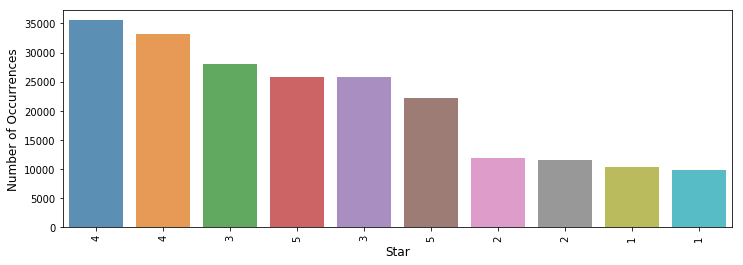

In [11]:
plot_star_count(df['star'].value_counts())

### 2.7 整理评分数据

In [12]:
num_str_list = ['0', '1', '2', '3', '4', '5']
for i in range(len(num_str_list)):
    df.loc[df['star'] == num_str_list[i], 'star'] = i

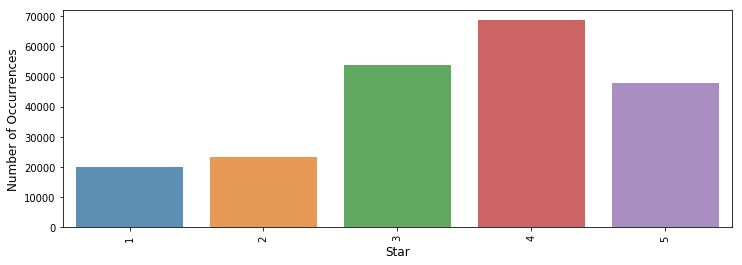

In [13]:
plot_star_count(df['star'].value_counts())

### 2.8 数据平衡

In [14]:
star_counts = df['star'].value_counts()

In [15]:
size_per_class = star_counts.min()

In [16]:
star_class_list = df['star'].unique().tolist()
star_class_list.sort()

In [17]:
print(star_class_list)

[1, 2, 3, 4, 5]


In [18]:
def make_banlance_samples(df, star_class, size_per_class):
    tmp = df[df['star'] == star_class]
    if tmp.shape[0] > size_per_class:
        tmp = tmp.sample(n=size_per_class, random_state=42)
    return tmp

In [19]:
def merge_df(df, star_class_list, size_per_class):
    new_df = pd.DataFrame()
    for star_class in star_class_list:
        #star_ser = make_banlance_samples(df, star_class, size_per_class)
        new_df = new_df.append(make_banlance_samples(df, star_class, size_per_class))
    
    return new_df

In [20]:
new_df = merge_df(df, star_class_list, size_per_class)

In [21]:
new_df.head()

,comment,star
0,吴京意淫到了脑残的地步，看了恶心想吐,1
4,中二得很,1
5,“犯我中华者，虽远必诛”，吴京比这句话还要意淫一百倍。,1
9,15/100吴京的冷峰在这部里即像成龙，又像杰森斯坦森，但体制外的同类型电影，主角总是代表个...,1
10,犯我中华者虽远必诛，是有多无脑才信这句话。,1


In [22]:
new_df.to_csv('cleaned_douban.csv',index=False)

## 3. 从词向量到句向量

### 3.1 加载训练好的word2vec 模型

In [23]:
from mysentencevector import wordvector_init
wordvector_init()

 ### 3.2 sentence embedding
 
 A Simple but Tough-to-Beat Baseline for Sentence Embeddings
 ref： https://github.com/PrincetonML/SIF

In [24]:
import numpy as np
from mysentencevector import sentence_embedding

In [28]:
sentence_vectors = []
for sentence in new_df['comment']:
    sentence_vectors.append(sentence_embedding(sentence))

X = np.array(sentence_vectors)

In [29]:
X.shape

(100560, 35)

In [30]:
X[0:3]

array([[ 0.402918  , -0.24313736, -0.55249035, -0.5433328 , -0.01678445,
         0.00381164,  0.3462923 , -0.24028827,  0.20218673, -0.04675195,
        -0.45748407, -0.4698066 ,  0.00733575, -0.13067473,  0.28129092,
         0.34101626,  0.08989596,  0.09740274,  0.1605913 ,  0.06776921,
         0.8163701 , -0.2319529 ,  0.40226004,  0.4536681 ,  0.17766389,
        -0.0104429 , -0.27804822,  0.3813243 , -0.30786917,  0.20341723,
        -0.13762167,  0.14506333,  0.23634306, -0.21737812,  0.0534651 ],
       [ 0.01587847,  0.05308336, -0.21832651, -0.23665413,  0.06913464,
         0.23112088,  0.14213857, -0.09775845,  0.27337062, -0.14695255,
        -0.11242937,  0.23582333, -0.21258043,  0.20907474, -0.12181608,
         0.07227021,  0.08540307,  0.15443327,  0.28664625, -0.00606506,
        -0.10453802,  0.03585221,  0.041632  ,  0.02251484,  0.2499591 ,
         0.12495662,  0.02057814,  0.16412224, -0.40397882,  0.19430396,
        -0.06306209,  0.07814743,  0.13363637,  0.

## 4.3 对labels重新编码 as float 1-hot encodings

In [31]:
labels = new_df['star'].values

In [32]:
def to_one_hot(labels, dimension=5):
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    results = np.zeros((len(labels), dimension), dtype='float32')
    for i, label in enumerate(labels):
        results[i, label-1]=1.
    return results

In [33]:
y = to_one_hot(labels)

In [34]:
y[0:3]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

##  4.Train neaual network model

## 4.1 按比例80 10 10 划分训练集，验证集，测试集

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train_dataset, X_test, train_labels, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
valid_dataset, test_dataset, valid_labels, test_labels = train_test_split(X_test, y_test, test_size=0.5, random_state=42) 

### 4.2 构建tf graph

In [38]:
embedding_size = 35
num_labels = 5

In [39]:
import tensorflow as tf

In [40]:
num_nodes= 1024
batch_size = 150

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, embedding_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights_1 = tf.Variable(tf.truncated_normal([embedding_size, num_nodes]))
    biases_1 = tf.Variable(tf.zeros([num_nodes]))
    weights_2 = tf.Variable(tf.truncated_normal([num_nodes, num_labels]))
    biases_2 = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    logits_1 = tf.matmul(tf_train_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits_2))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training
    train_prediction = tf.nn.softmax(logits_2)
    
    # Predictions for validation 
    logits_1 = tf.matmul(tf_valid_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    
    valid_prediction = tf.nn.softmax(logits_2)
    
    # Predictions for test
    logits_1 = tf.matmul(tf_test_dataset, weights_1) + biases_1
    relu_layer= tf.nn.relu(logits_1)
    logits_2 = tf.matmul(relu_layer, weights_2) + biases_2
    
    test_prediction = tf.nn.softmax(logits_2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [41]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])


In [42]:
num_steps = 10001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
            print("Minibatch loss at step {}: {}".format(step, l))
            print("Minibatch accuracy: {:.1f}%".format(accuracy(predictions, batch_labels)))
            print("Validation accuracy: {:.1f}%".format(accuracy(valid_prediction.eval(), valid_labels)))
    print("Test accuracy: {:.1f}%".format(accuracy(test_prediction.eval(), test_labels)))

Initialized
Minibatch loss at step 0: 21.134183883666992
Minibatch accuracy: 24.7%
Validation accuracy: 22.2%
Minibatch loss at step 500: 2.551525831222534
Minibatch accuracy: 34.7%
Validation accuracy: 33.0%
Minibatch loss at step 1000: 2.1143343448638916
Minibatch accuracy: 34.0%
Validation accuracy: 34.7%
Minibatch loss at step 1500: 1.853060245513916
Minibatch accuracy: 34.0%
Validation accuracy: 36.0%
Minibatch loss at step 2000: 1.5503220558166504
Minibatch accuracy: 40.7%
Validation accuracy: 36.9%
Minibatch loss at step 2500: 1.4790922403335571
Minibatch accuracy: 32.0%
Validation accuracy: 37.2%
Minibatch loss at step 3000: 1.5162044763565063
Minibatch accuracy: 38.0%
Validation accuracy: 37.2%
Minibatch loss at step 3500: 1.424239993095398
Minibatch accuracy: 43.3%
Validation accuracy: 37.2%
Minibatch loss at step 4000: 1.3311882019042969
Minibatch accuracy: 44.0%
Validation accuracy: 37.5%
Minibatch loss at step 4500: 1.3852144479751587
Minibatch accuracy: 38.7%
Validation a